In [72]:
# Import required libraries
import xarray as xr
from pathlib import Path
import numpy as np
import datetime
import pandas as pd
import cfgrib
import os
import shutil
from datetime import datetime
import matplotlib.pyplot as plt

In [73]:
bolam_cube = xr.open_dataset(Path.home() / 'hdd1/diogenis/observatory/bolam_meteo.nc')

In [74]:
bolam_cube

<xarray.Dataset>
Dimensions:         (time: 183, y: 983, x: 1253)
Coordinates:
  * time            (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-10-31
  * x               (x) float64 18.7 18.71 18.72 18.73 ... 28.88 28.89 28.9
  * y               (y) float64 42.3 42.29 42.28 42.27 ... 34.32 34.31 34.3
Data variables:
    max_t2m         (time, y, x) float32 ...
    min_relhum_2m   (time, y, x) float32 ...
    max_d2m         (time, y, x) float32 ...
    max_wind_speed  (time, y, x) float32 ...
    max_apcp        (time, y, x) float32 ...

In [ ]:
def copy_files_bolam(path, label, src):
    if src == 'bolam':
        if label == 'positives':
            destination_folder = Path.home() / 'hdd1/diogenis/observatory/positives_bolam'
        else:
            destination_folder = Path.home() / 'hdd1/diogenis/observatory/negatives_bolam'
    else:
        if label == 'positives':
            destination_folder = Path.home() / 'hdd1/diogenis/observatory/positives_era5_bolam'
        else:
            destination_folder = Path.home() / 'hdd1/diogenis/observatory/negatives_era5_bolam'
        
    #For Every file
    for file_name in os.listdir(path):
        #Get the date from the file name
        file_date = file_name.split('_')[0][:4] + '/' + file_name.split('_')[0][4:6] + '/' + file_name.split('_')[0][6:]
        
        #Convert from string to datetime
        file_date = datetime.strptime(file_date, '%Y/%m/%d')
        
        #If the year is 2021
        if file_date.year == 2021:
            
            #Check for the month and the day
            if (file_date.month ==5 and file_date.day >=10) or (file_date.month >=6 and file_date.month <= 10):
                
                #We don't care about the mode.npy files
                if file_name.split('_')[3] == 'static.npy' or file_name.split('_')[3] == 'dynamic.npy' or file_name.split('_')[4] == 'vec.npy':
                    source = path / file_name
                    destination = destination_folder / file_name
                    if os.path.isfile(source):
                        shutil.copy(source, destination)

In [ ]:
path = Path.home() / 'hdd1/iprapas/uc3/datasets_v4/npy/temporal/positives'
copy_files_bolam(path, 'positives','bolam')

In [ ]:
copy_files_bolam(path, 'positives', 'era5')

In [ ]:
path = Path.home() / 'hdd1/iprapas/uc3/datasets_v5/npy/temporal/negatives_clc'
copy_files_bolam(path, 'negatives', 'bolam')

In [ ]:
copy_files_bolam(path, 'negatives', 'era5')

In [75]:
values_t2m_era5 = []
values_wind_speed_era5 = []
values_tp_era5 = []
values_rh_era5 = []
values_d2m_era5 = []

values_t2m_positives_era5 = []
values_wind_speed_positives_era5 = []
values_tp_positives_era5 = []
values_rh_positives_era5 = []
values_d2m_positives_era5 = []

values_t2m_negatives_era5 = []
values_wind_speed_negatives_era5 = []
values_tp_negatives_era5 = []
values_rh_negatives_era5 = []
values_d2m_negatives_era5 = []
    
values_t2m_bolam = []
values_wind_speed_bolam = []
values_tp_bolam = []
values_rh_bolam = []
values_d2m_bolam = []

values_t2m_positives_bolam = []
values_wind_speed_positives_bolam = []
values_tp_positives_bolam = []
values_rh_positives_bolam = []
values_d2m_positives_bolam = []

values_t2m_negatives_bolam = []
values_wind_speed_negatives_bolam = []
values_tp_negatives_bolam = []
values_rh_negatives_bolam = []
values_d2m_negatives_bolam = []

In [76]:
def change_npy_files(path):
    #For every file
    for file_name in os.listdir(path):
        
        #Only if the file is dynamic.npy
        if file_name.split('_')[3] == 'dynamic.npy':
            
            #Get the date
            file_date = file_name.split('_')[0][:4] + '/' + file_name.split('_')[0][4:6] + '/' + file_name.split('_')[0][6:]
            file_date = datetime.strptime(file_date, '%Y/%m/%d')
            file_date = np.datetime64(file_date)
            
            #Add 12 hours so it matches the dimension in our datacube
            # file_date = file_date + np.timedelta64(12, 'h')
            
            #Get the lat and lon
            x_index = file_name.split('_')[1]
            x_index = int(x_index)
            y_index = file_name.split('_')[2]
            y_index = int(y_index)

            #Open the file
            test = np.load(path / file_name)
            
            values_t2m_era5.append(test[9][10])
            values_wind_speed_era5.append(test[9][30])
            values_tp_era5.append(test[9][12])
            values_rh_era5.append(test[9][33])
            values_d2m_era5.append(test[9][9])
            
            if path.parts[-1] == 'positives_bolam':
                values_t2m_positives_era5.append(test[9][10])
                values_wind_speed_positives_era5.append(test[9][30])
                values_tp_positives_era5.append(test[9][12])
                values_rh_positives_era5.append(test[9][33])
                values_d2m_positives_era5.append(test[9][9])
            else:
                values_t2m_negatives_era5.append(test[9][10])
                values_wind_speed_negatives_era5.append(test[9][30])
                values_tp_negatives_era5.append(test[9][12])
                values_rh_negatives_era5.append(test[9][33])
                values_d2m_negatives_era5.append(test[9][9])
            
            #For every day in the file
            for i in range(10):
                
                #Get the appropriate date
                tmp = file_date - np.timedelta64(9-i,'D')
                
                #Get the values from the datacube
                bolam_max_t2m = bolam_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_t2m.values
                bolam_max_tp = bolam_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_apcp.values        
                bolam_max_wind_speed = bolam_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_wind_speed.values
                bolam_min_rh = bolam_cube.sel(time = tmp).isel(x = x_index, y = y_index).min_relhum_2m.values
                bolam_max_d2m = bolam_cube.sel(time = tmp).isel(x = x_index, y = y_index).max_d2m.values
                
                if i == 9:
                    values_t2m_bolam.append(bolam_max_t2m)
                    values_wind_speed_bolam.append(bolam_max_wind_speed)
                    values_tp_bolam.append(bolam_max_tp)
                    values_rh_bolam.append(bolam_min_rh)
                    values_d2m_bolam.append(bolam_max_d2m)
                    
                    if path.parts[-1] == 'positives_bolam':
                        values_t2m_positives_bolam.append(bolam_max_t2m)
                        values_wind_speed_positives_bolam.append(bolam_max_wind_speed)
                        values_tp_positives_bolam.append(bolam_max_tp)
                        values_rh_positives_bolam.append(bolam_min_rh)
                        values_d2m_positives_bolam.append(bolam_max_d2m)
                    else:
                        values_t2m_negatives_bolam.append(bolam_max_t2m)
                        values_wind_speed_negatives_bolam.append(bolam_max_wind_speed)
                        values_tp_negatives_bolam.append(bolam_max_tp)
                        values_rh_negatives_bolam.append(bolam_min_rh)
                        values_d2m_negatives_bolam.append(bolam_max_d2m)
            
                #Change the values in the file
                test[i][10] = bolam_max_t2m
                test[i][12] = bolam_max_tp
                test[i][30] = bolam_max_wind_speed
                test[i][33] = bolam_min_rh
                test[i][9] = bolam_max_d2m
            
            #Save the new values to the file
            np.save(path / file_name, test)

In [77]:
path = Path.home() / 'hdd1/diogenis/observatory/positives_bolam'
change_npy_files(path)

In [78]:
path = Path.home() / 'hdd1/diogenis/observatory/negatives_bolam'
change_npy_files(path)

In [79]:
values_t2m_era5 = np.array(values_t2m_era5)
values_wind_speed_era5 = np.array(values_wind_speed_era5)
values_tp_era5 = np.array(values_tp_era5)
values_rh_era5 = np.array(values_rh_era5)
values_d2m_era5 = np.array(values_d2m_era5)

values_t2m_positives_era5 = np.array(values_t2m_positives_era5)
values_wind_speed_positives_era5 = np.array(values_wind_speed_positives_era5)
values_tp_positives_era5 = np.array(values_tp_positives_era5)
values_rh_positives_era5 = np.array(values_rh_positives_era5)
values_d2m_positives_era5 = np.array(values_d2m_positives_era5)

values_t2m_negatives_era5 = np.array(values_t2m_negatives_era5)
values_wind_speed_negatives_era5 = np.array(values_wind_speed_negatives_era5)
values_tp_negatives_era5 = np.array(values_tp_negatives_era5)
values_rh_negatives_era5 = np.array(values_rh_negatives_era5)
values_d2m_negatives_era5 = np.array(values_d2m_negatives_era5)

values_t2m_bolam = np.array(values_t2m_bolam)
values_wind_speed_bolam = np.array(values_wind_speed_bolam)
values_tp_bolam = np.array(values_tp_bolam)
values_rh_bolam = np.array(values_rh_bolam)
values_d2m_bolam = np.array(values_d2m_bolam)

values_t2m_positives_bolam = np.array(values_t2m_positives_bolam)
values_wind_speed_positives_bolam = np.array(values_wind_speed_positives_bolam)
values_tp_positives_bolam = np.array(values_tp_positives_bolam)
values_rh_positives_bolam = np.array(values_rh_positives_bolam)
values_d2m_positives_bolam = np.array(values_d2m_positives_bolam)

values_t2m_negatives_bolam = np.array(values_t2m_negatives_bolam)
values_wind_speed_negatives_bolam = np.array(values_wind_speed_negatives_bolam)
values_tp_negatives_bolam = np.array(values_tp_negatives_bolam)
values_rh_negatives_bolam = np.array(values_rh_negatives_bolam)
values_d2m_negatives_bolam = np.array(values_d2m_negatives_bolam)

In [80]:
t2m_difference = values_t2m_era5 - values_t2m_bolam
wind_speed_difference = values_wind_speed_era5 - values_wind_speed_bolam
tp_difference = values_tp_era5 - values_tp_bolam
rh_difference = values_rh_era5 - values_rh_bolam
d2m_difference = values_d2m_era5 - values_d2m_bolam

t2m_positives_difference = values_t2m_positives_era5 - values_t2m_positives_bolam
tp_positives_difference = values_tp_positives_era5 - values_tp_positives_bolam
wind_speed_positives_difference = values_wind_speed_positives_era5 - values_wind_speed_positives_bolam
rh_positives_difference = values_rh_positives_era5 - values_rh_positives_bolam
d2m_positives_difference = values_d2m_positives_era5 - values_d2m_positives_bolam

t2m_negatives_difference = values_t2m_negatives_era5 - values_t2m_negatives_bolam
tp_negatives_difference = values_tp_negatives_era5 - values_tp_negatives_bolam
wind_speed_negatives_difference = values_wind_speed_negatives_era5 - values_wind_speed_negatives_bolam
rh_negatives_difference = values_rh_negatives_era5 - values_rh_negatives_bolam
d2m_negatives_difference = values_d2m_negatives_era5 - values_d2m_negatives_bolam

In [81]:
def compare_stats(era5, bolam, stat):
    era5_max = era5.max()
    bolam_max = bolam.max()
    print('The era5 max ' + stat + ' is: ' + str(era5_max))
    print('The bolam max ' + stat + ' is: ' + str(bolam_max))
    
    era5_min = era5.min()
    bolam_min = bolam.min()
    print('The era5 min ' + stat + ' is: ' + str(era5_min))
    print('The bolam min ' + stat + ' is: ' + str(bolam_min))
    
    era5_avg = era5.mean()
    bolam_avg = bolam.mean()
    print('The era5 avg ' + stat + ' is: ' + str(era5_avg))
    print('The bolam avg ' + stat + ' is: ' + str(bolam_avg))
    
    era5_std = era5.std()
    bolam_std = bolam.std()
    print('The era5 std ' + stat + ' is: ' + str(era5_std))
    print('The bolam std ' + stat + ' is: ' + str(bolam_std))

In [82]:
compare_stats(values_t2m_era5, values_t2m_bolam, 't2m')

The era5 max t2m is: 314.914
The bolam max t2m is: 316.86026
The era5 min t2m is: 278.28073
The bolam min t2m is: 277.28278
The era5 avg t2m is: 300.15372
The bolam avg t2m is: 300.5235
The era5 std t2m is: 6.8909235
The bolam std t2m is: 7.259073


In [83]:
compare_stats(values_wind_speed_era5, values_wind_speed_bolam, 'wind speed')

The era5 max wind speed is: 13.134581
The bolam max wind speed is: 15.236929
The era5 min wind speed is: 0.5270471
The bolam min wind speed is: 0.9129815
The era5 avg wind speed is: 3.4763775
The bolam avg wind speed is: 5.006407
The era5 std wind speed is: 1.7795994
The bolam std wind speed is: 1.8075546


In [84]:
compare_stats(values_tp_era5, values_tp_bolam, 'tp')

The era5 max tp is: 0.04634493
The bolam max tp is: 0.09817847
The era5 min tp is: 0.0
The bolam min tp is: 0.0
The era5 avg tp is: 0.001818625
The bolam avg tp is: 0.001240206
The era5 std tp is: 0.0038594927
The bolam std tp is: 0.0043375734


In [85]:
compare_stats(values_rh_era5, values_rh_bolam, 'rh')

The era5 max rh is: 0.87368745
The bolam max rh is: 0.97347814
The era5 min rh is: 0.080229394
The bolam min rh is: 0.06794826
The era5 avg rh is: 0.3936601
The bolam avg rh is: 0.34078538
The era5 std rh is: 0.1678525
The bolam std rh is: 0.14691897


In [86]:
compare_stats(values_d2m_era5, values_d2m_bolam, 'd2m')

The era5 max d2m is: 298.0342
The bolam max d2m is: 299.97635
The era5 min d2m is: 272.93335
The bolam min d2m is: 272.28638
The era5 avg d2m is: 287.49414
The bolam avg d2m is: 286.38812
The era5 std d2m is: 4.0416446
The bolam std d2m is: 4.3022003


In [87]:
compare_stats(values_t2m_positives_era5, values_t2m_positives_bolam, 't2m positives')

The era5 max t2m positives is: 314.914
The bolam max t2m positives is: 316.86026
The era5 min t2m positives is: 293.74472
The bolam min t2m positives is: 292.14432
The era5 avg t2m positives is: 308.34396
The bolam avg t2m positives is: 309.00955
The era5 std t2m positives is: 3.985268
The bolam std t2m positives is: 4.8140917


In [88]:
compare_stats(values_wind_speed_positives_era5, values_wind_speed_positives_bolam, 'wind speed positives')

The era5 max wind speed positives is: 12.721206
The bolam max wind speed positives is: 14.716552
The era5 min wind speed positives is: 1.2105005
The bolam min wind speed positives is: 1.1234492
The era5 avg wind speed positives is: 4.4714346
The bolam avg wind speed positives is: 5.340211
The era5 std wind speed positives is: 1.782837
The bolam std wind speed positives is: 2.2475188


In [89]:
compare_stats(values_tp_positives_era5, values_tp_positives_bolam, 'tp positives')

The era5 max tp positives is: 0.003579609
The bolam max tp positives is: 0.0004868164
The era5 min tp positives is: 0.0
The bolam min tp positives is: 0.0
The era5 avg tp positives is: 4.2008323e-05
The bolam avg tp positives is: 1.2865854e-06
The era5 std tp positives is: 0.00015412967
The bolam std tp positives is: 2.0491261e-05


In [90]:
compare_stats(values_rh_positives_era5, values_rh_positives_bolam, 'rh positives')

The era5 max rh positives is: 0.75800014
The bolam max rh positives is: 0.61947095
The era5 min rh positives is: 0.080229394
The bolam min rh positives is: 0.06828726
The era5 avg rh positives is: 0.22031657
The bolam avg rh positives is: 0.19177416
The era5 std rh positives is: 0.113313034
The bolam std rh positives is: 0.0879316


In [91]:
compare_stats(values_d2m_positives_era5, values_d2m_positives_bolam, 'd2m positives')

The era5 max d2m positives is: 298.0342
The bolam max d2m positives is: 299.97635
The era5 min d2m positives is: 280.0141
The bolam min d2m positives is: 277.54977
The era5 avg d2m positives is: 288.85107
The bolam avg d2m positives is: 286.78925
The era5 std d2m positives is: 3.77205
The bolam std d2m positives is: 5.5792885


In [92]:
compare_stats(values_t2m_negatives_era5, values_t2m_negatives_bolam, 't2m negatives')

The era5 max t2m negatives is: 313.61798
The bolam max t2m negatives is: 315.61066
The era5 min t2m negatives is: 278.28073
The bolam min t2m negatives is: 277.28278
The era5 avg t2m negatives is: 297.47183
The bolam avg t2m negatives is: 297.74478
The era5 std t2m negatives is: 5.3549447
The bolam std t2m negatives is: 5.5729904


In [93]:
compare_stats(values_wind_speed_negatives_era5, values_wind_speed_negatives_bolam, 'wind speed negatives')

The era5 max wind speed negatives is: 13.134581
The bolam max wind speed negatives is: 15.236929
The era5 min wind speed negatives is: 0.5270471
The bolam min wind speed negatives is: 0.9129815
The era5 avg wind speed negatives is: 3.150551
The bolam avg wind speed negatives is: 4.8971047
The era5 std wind speed negatives is: 1.6531239
The bolam std wind speed negatives is: 1.6231545


In [94]:
compare_stats(values_tp_negatives_era5, values_tp_negatives_bolam, 'tp negatives')

The era5 max tp negatives is: 0.04634493
The bolam max tp negatives is: 0.09817847
The era5 min tp negatives is: 0.0
The bolam min tp negatives is: 0.0
The era5 avg tp negatives is: 0.0024003694
The bolam avg tp negatives is: 0.001645884
The era5 std tp negatives is: 0.00428876
The bolam std tp negatives is: 0.00493031


In [95]:
compare_stats(values_rh_negatives_era5, values_rh_negatives_bolam, 'rh negatives')

The era5 max rh negatives is: 0.87368745
The bolam max rh negatives is: 0.97347814
The era5 min rh negatives is: 0.089775786
The bolam min rh negatives is: 0.06794826
The era5 avg rh negatives is: 0.45042062
The bolam avg rh negatives is: 0.3895783
The era5 std rh negatives is: 0.14189745
The bolam std rh negatives is: 0.12833509


In [96]:
compare_stats(values_d2m_negatives_era5, values_d2m_negatives_bolam, 'd2m negatives')

The era5 max d2m negatives is: 297.8686
The bolam max d2m negatives is: 297.89294
The era5 min d2m negatives is: 272.93335
The bolam min d2m negatives is: 272.28638
The era5 avg d2m negatives is: 287.0498
The bolam avg d2m negatives is: 286.25677
The era5 std d2m negatives is: 4.0279427
The bolam std d2m negatives is: 3.7824311


In [97]:
def calculate_difference_stats(arr, stat):
    print("The max of " + stat + ' difference is ' + str(arr.max()))
    print("The min of " + stat + ' difference is ' + str(arr.min()))
    print("The avg of " + stat + ' difference is ' + str(arr.mean()))
    print("The std of " + stat + ' difference is ' + str(arr.std()))

In [98]:
calculate_difference_stats(t2m_difference, 't2m')

The max of t2m difference is 10.07489
The min of t2m difference is -12.840607
The avg of t2m difference is -0.36976865
The std of t2m difference is 2.9226072


In [99]:
calculate_difference_stats(wind_speed_difference, 'wind speed')

The max of wind speed difference is 8.796373
The min of wind speed difference is -10.113092
The avg of wind speed difference is -1.5300297
The std of wind speed difference is 2.0743308


In [100]:
calculate_difference_stats(tp_difference, 'tp')

The max of tp difference is 0.045586996
The min of tp difference is -0.07807895
The avg of tp difference is 0.00057841913
The std of tp difference is 0.004088155


In [101]:
calculate_difference_stats(rh_difference, 'rh')

The max of rh difference is 0.57704234
The min of rh difference is -0.51218015
The avg of rh difference is 0.05287477
The std of rh difference is 0.123221494


In [102]:
calculate_difference_stats(d2m_difference, 'd2m')

The max of d2m difference is 13.613831
The min of d2m difference is -10.25824
The avg of d2m difference is 1.1059853
The std of d2m difference is 3.0321553


In [103]:
calculate_difference_stats(t2m_positives_difference, 't2m positives')

The max of t2m positives difference is 8.586456
The min of t2m positives difference is -11.75592
The avg of t2m positives difference is -0.6655746
The std of t2m positives difference is 3.240374


In [104]:
calculate_difference_stats(tp_positives_difference, 'tp positives')

The max of tp positives difference is 0.003579487
The min of tp positives difference is -0.00037788146
The avg of tp positives difference is 4.0721738e-05
The std of tp positives difference is 0.00015366892


In [105]:
calculate_difference_stats(wind_speed_positives_difference, 'wind speed positives')

The max of wind speed positives difference is 8.796373
The min of wind speed positives difference is -9.9545555
The avg of wind speed positives difference is -0.8687765
The std of wind speed positives difference is 2.6970034


In [106]:
calculate_difference_stats(rh_positives_difference, 'rh positives')

The max of rh positives difference is 0.44240975
The min of rh positives difference is -0.2237905
The avg of rh positives difference is 0.028542416
The std of rh positives difference is 0.10651214


In [107]:
calculate_difference_stats(d2m_positives_difference, 'd2m positives')

The max of d2m positives difference is 12.444489
The min of d2m positives difference is -9.555786
The avg of d2m positives difference is 2.0618072
The std of d2m positives difference is 3.9886184


In [108]:
calculate_difference_stats(t2m_negatives_difference, 't2m negatives')

The max of t2m negatives difference is 10.07489
The min of t2m negatives difference is -12.840607
The avg of t2m negatives difference is -0.27290845
The std of t2m negatives difference is 2.8039854


In [109]:
calculate_difference_stats(tp_negatives_difference, 'tp negatives')

The max of tp negatives difference is 0.045586996
The min of tp negatives difference is -0.07807895
The avg of tp negatives difference is 0.0007544854
The std of tp negatives difference is 0.0046959775


In [110]:
calculate_difference_stats(wind_speed_negatives_difference, 'wind speed negatives')

The max of wind speed negatives difference is 7.884736
The min of wind speed negatives difference is -10.113092
The avg of wind speed negatives difference is -1.7465537
The std of wind speed negatives difference is 1.7719921


In [111]:
calculate_difference_stats(rh_negatives_difference, 'rh negatives')

The max of rh negatives difference is 0.57704234
The min of rh negatives difference is -0.51218015
The avg of rh negatives difference is 0.060842283
The std of rh negatives difference is 0.12721302


In [112]:
calculate_difference_stats(d2m_negatives_difference, 'd2m negatives')

The max of d2m negatives difference is 13.613831
The min of d2m negatives difference is -10.25824
The avg of d2m negatives difference is 0.79300624
The std of d2m negatives difference is 2.5686631


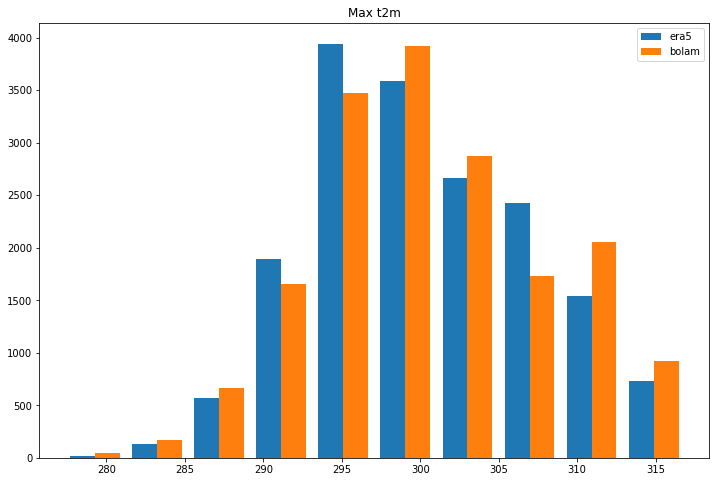

In [113]:
plt.figure(figsize=(12,8))
plt.title("Max t2m")
plt.hist([values_t2m_era5, values_t2m_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

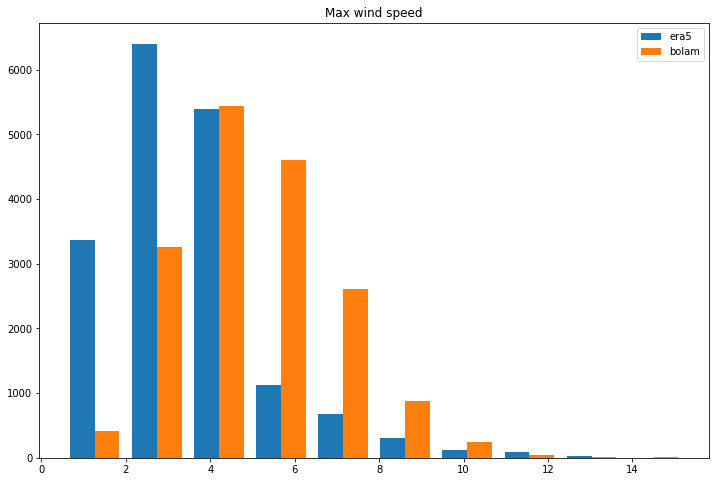

In [114]:
plt.figure(figsize=(12,8))
plt.title("Max wind speed")
plt.hist([values_wind_speed_era5, values_wind_speed_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

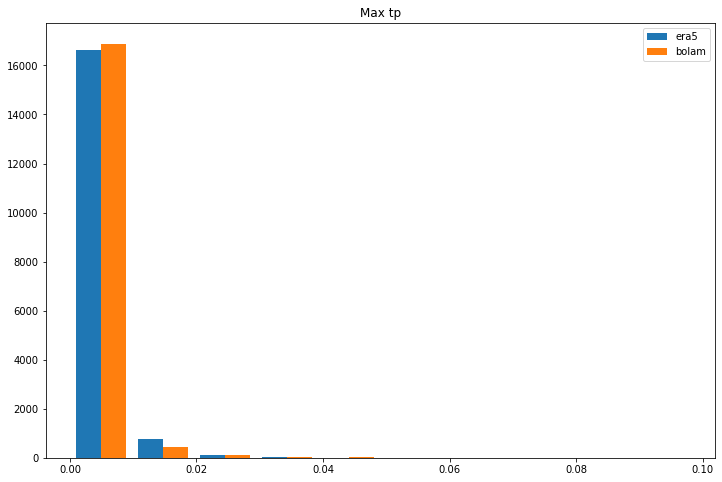

In [115]:
plt.figure(figsize=(12,8))
plt.title("Max tp")
plt.hist([values_tp_era5, values_tp_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

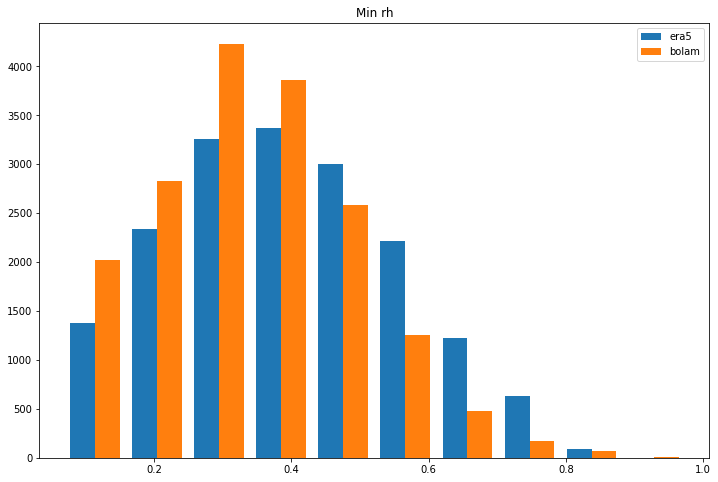

In [116]:
plt.figure(figsize=(12,8))
plt.title("Min rh")
plt.hist([values_rh_era5, values_rh_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

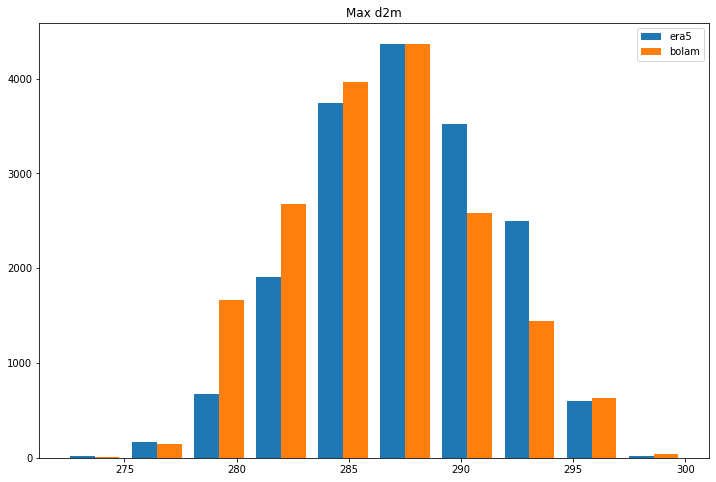

In [117]:
plt.figure(figsize=(12,8))
plt.title("Max d2m")
plt.hist([values_d2m_era5, values_d2m_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

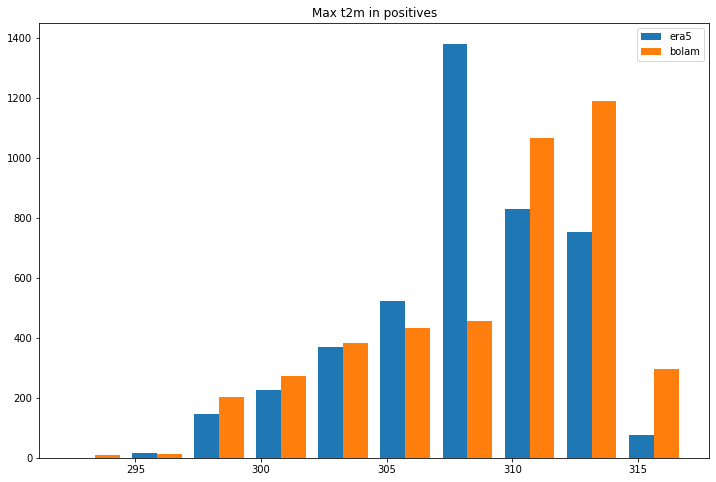

In [118]:
plt.figure(figsize=(12,8))
plt.title("Max t2m in positives")
plt.hist([values_t2m_positives_era5, values_t2m_positives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

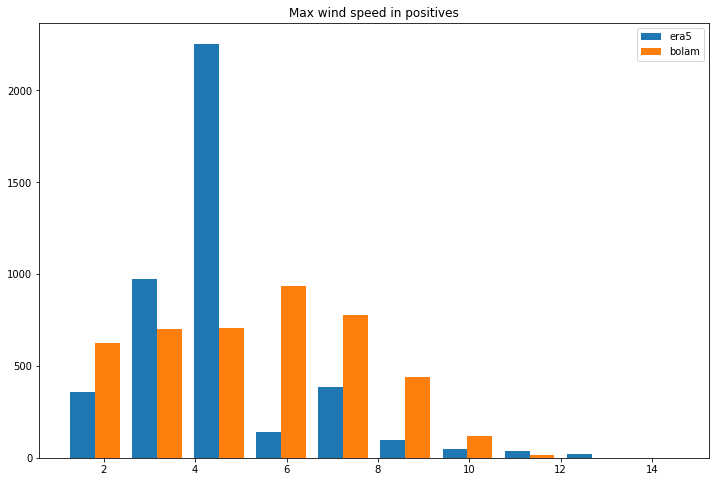

In [119]:
plt.figure(figsize=(12,8))
plt.title("Max wind speed in positives")
plt.hist([values_wind_speed_positives_era5, values_wind_speed_positives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

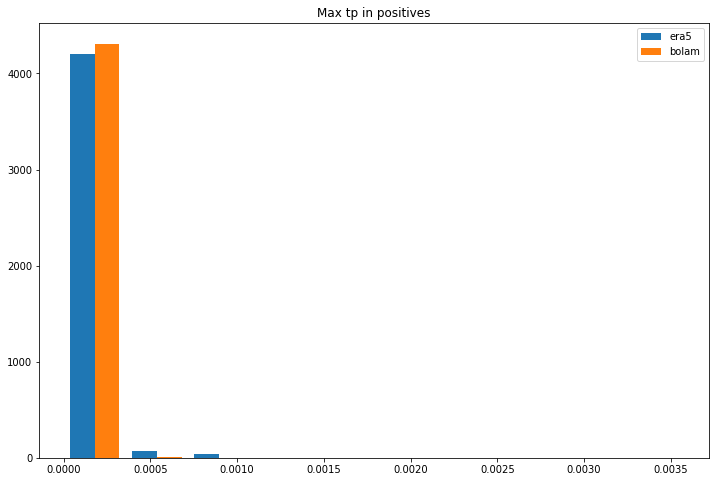

In [120]:
plt.figure(figsize=(12,8))
plt.title("Max tp in positives")
plt.hist([values_tp_positives_era5, values_tp_positives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

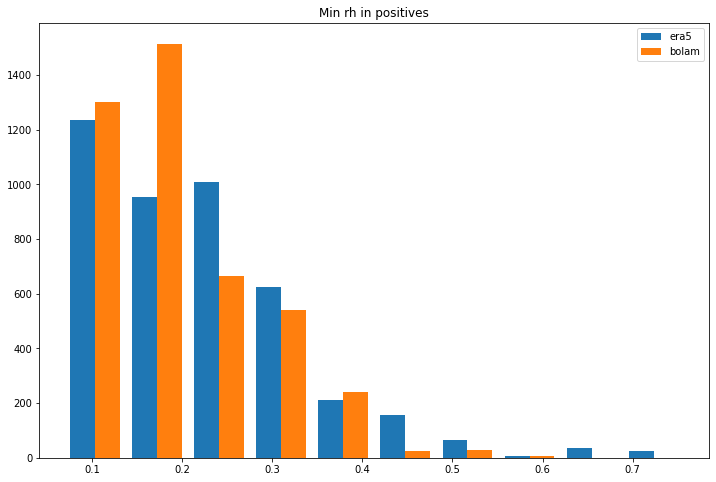

In [121]:
plt.figure(figsize=(12,8))
plt.title("Min rh in positives")
plt.hist([values_rh_positives_era5, values_rh_positives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

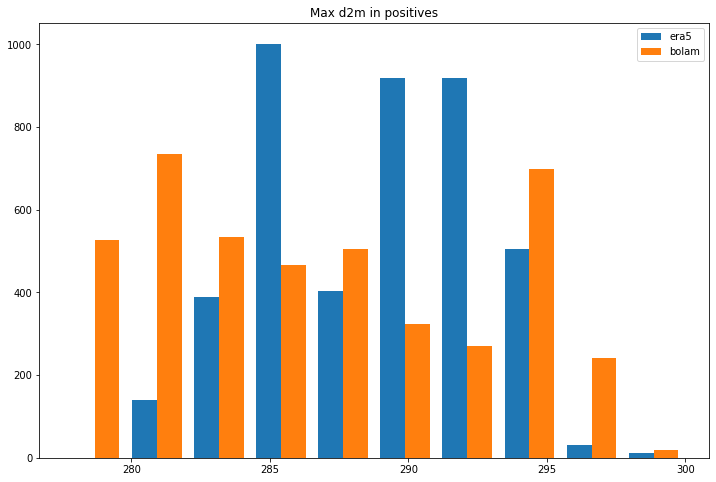

In [122]:
plt.figure(figsize=(12,8))
plt.title("Max d2m in positives")
plt.hist([values_d2m_positives_era5, values_d2m_positives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

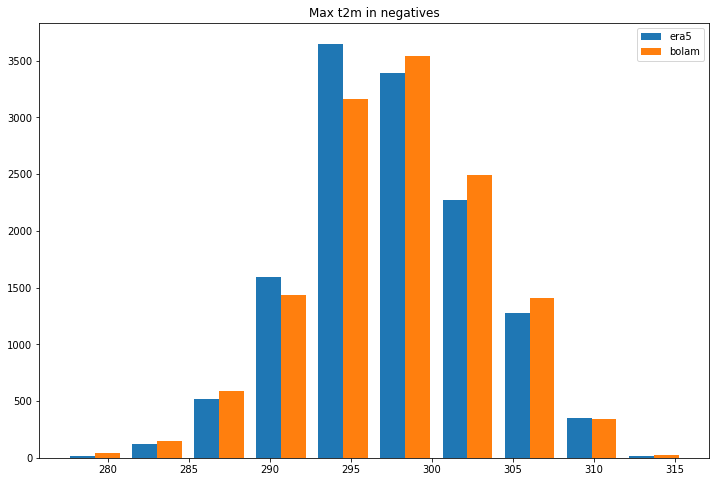

In [123]:
plt.figure(figsize=(12,8))
plt.title("Max t2m in negatives")
plt.hist([values_t2m_negatives_era5, values_t2m_negatives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

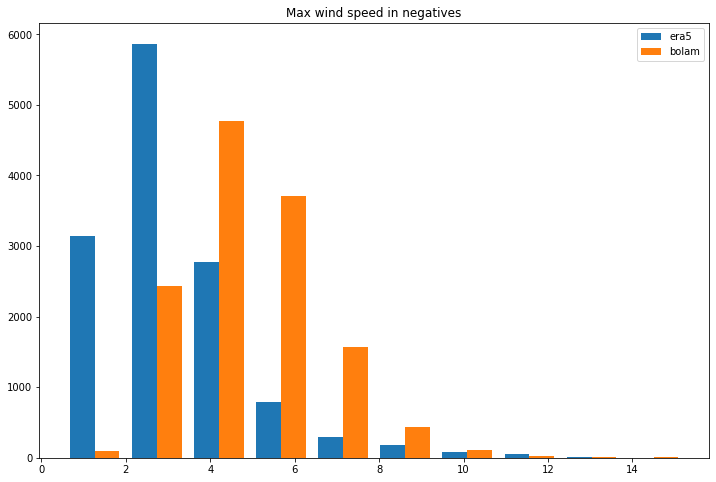

In [124]:
plt.figure(figsize=(12,8))
plt.title("Max wind speed in negatives")
plt.hist([values_wind_speed_negatives_era5, values_wind_speed_negatives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

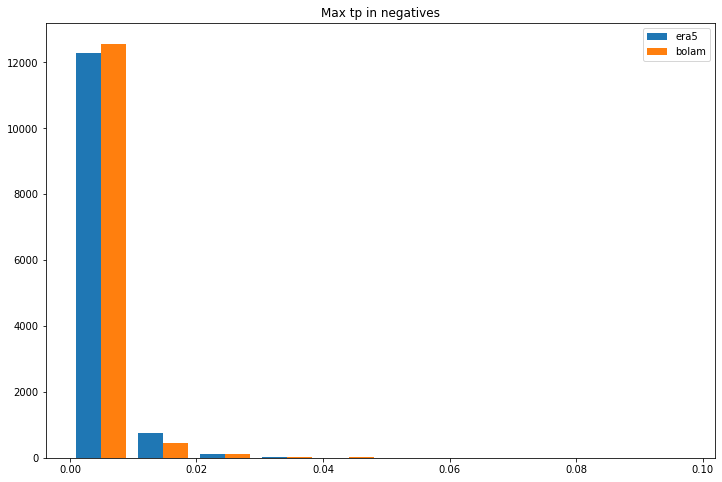

In [125]:
plt.figure(figsize=(12,8))
plt.title("Max tp in negatives")
plt.hist([values_tp_negatives_era5, values_tp_negatives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

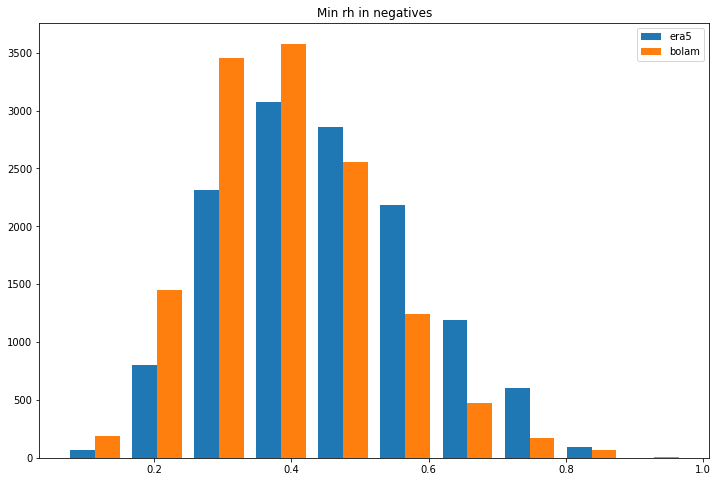

In [126]:
plt.figure(figsize=(12,8))
plt.title("Min rh in negatives")
plt.hist([values_rh_negatives_era5, values_rh_negatives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

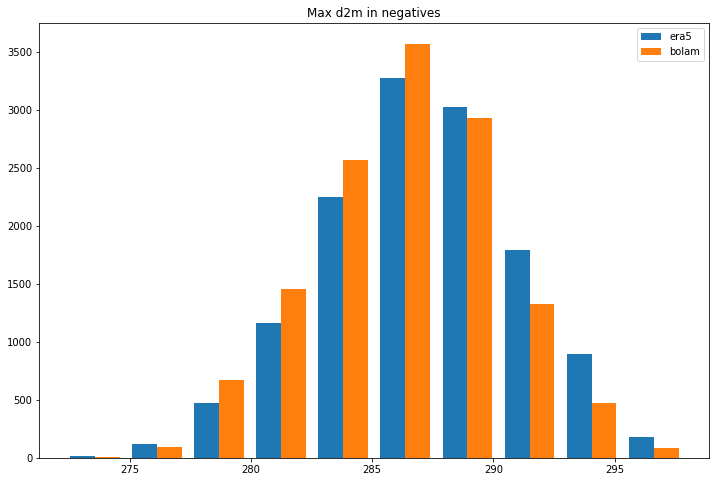

In [127]:
plt.figure(figsize=(12,8))
plt.title("Max d2m in negatives")
plt.hist([values_d2m_negatives_era5, values_d2m_negatives_bolam], label=['era5', 'bolam'])
plt.legend(loc='upper right')
plt.show()

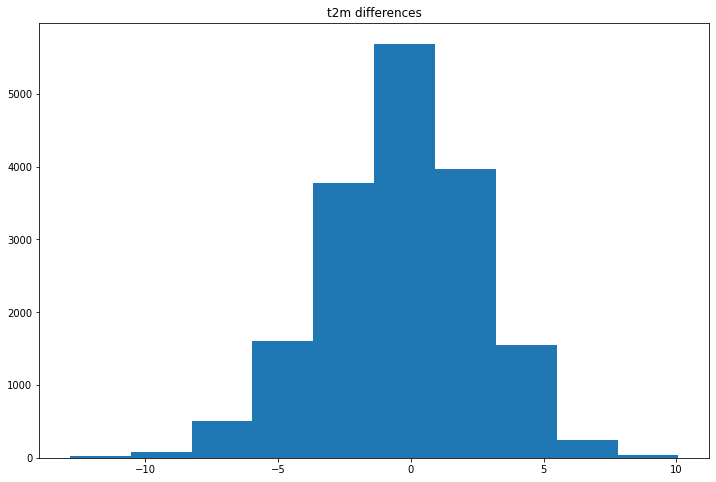

In [128]:
plt.figure(figsize=(12,8))
plt.title("t2m differences")
plt.hist(t2m_difference)
plt.show()

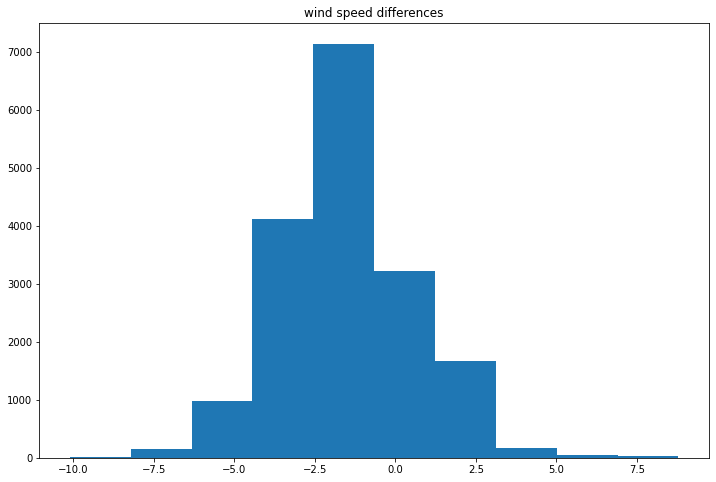

In [129]:
plt.figure(figsize=(12,8))
plt.title("wind speed differences")
plt.hist(wind_speed_difference)
plt.show()

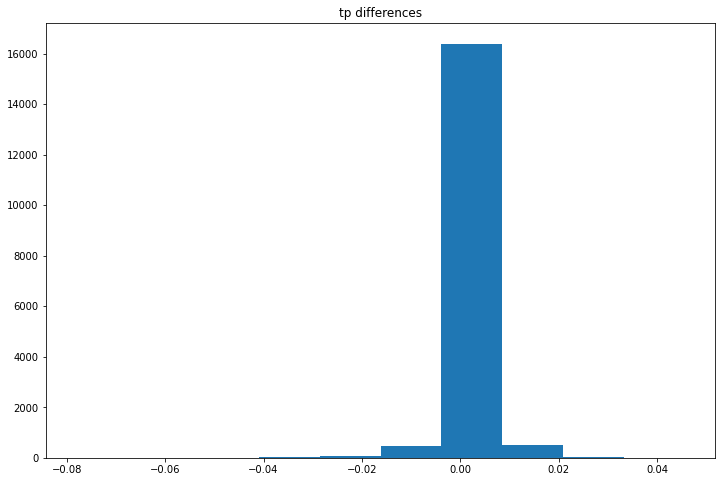

In [130]:
plt.figure(figsize=(12,8))
plt.title("tp differences")
plt.hist(tp_difference)
plt.show()

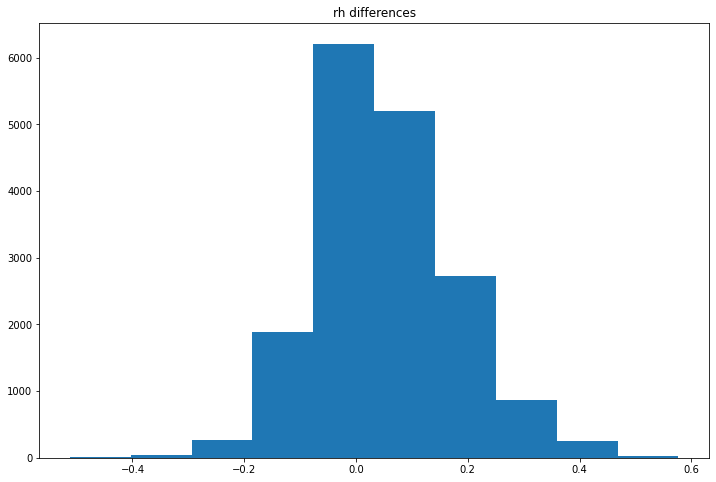

In [131]:
plt.figure(figsize=(12,8))
plt.title("rh differences")
plt.hist(rh_difference)
plt.show()

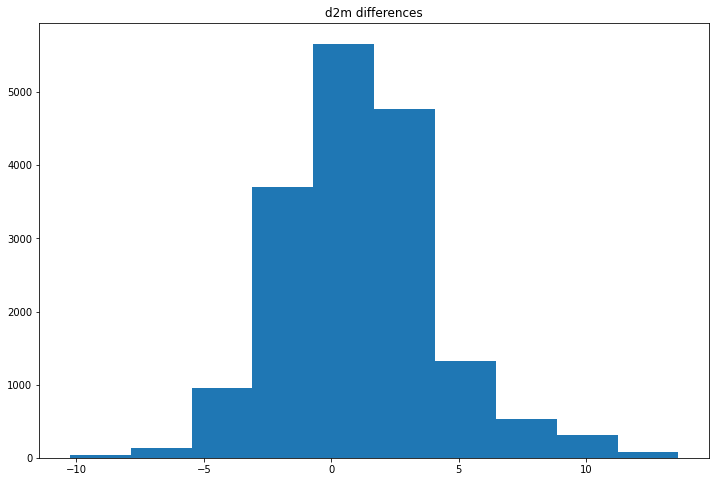

In [132]:
plt.figure(figsize=(12,8))
plt.title("d2m differences")
plt.hist(d2m_difference)
plt.show()

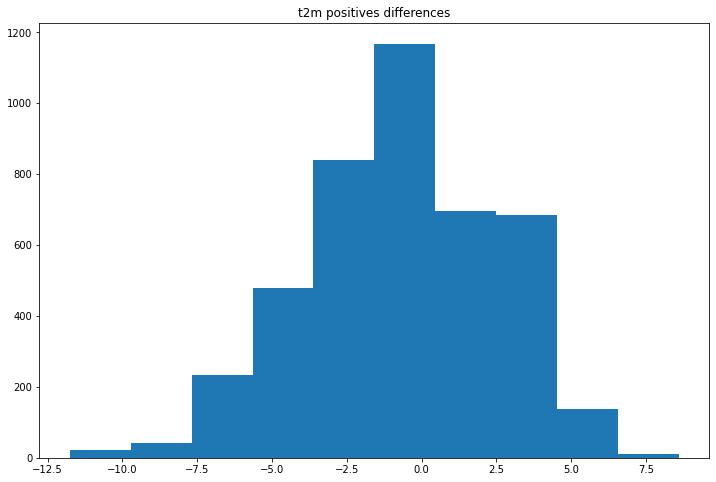

In [133]:
plt.figure(figsize=(12,8))
plt.title("t2m positives differences")
plt.hist(t2m_positives_difference)
plt.show()

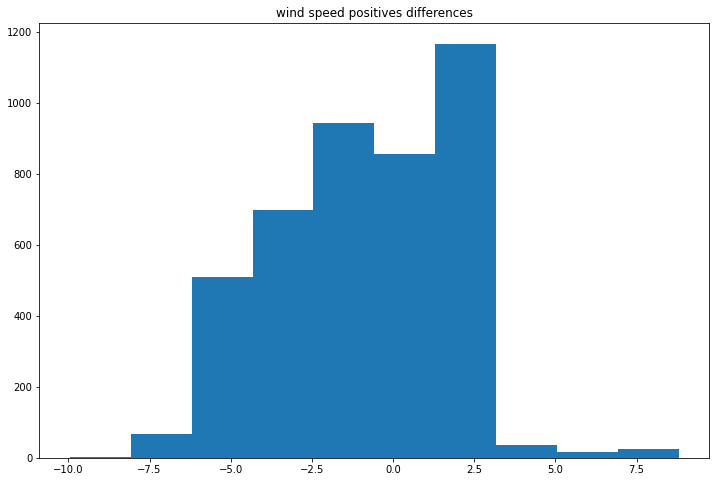

In [134]:
plt.figure(figsize=(12,8))
plt.title("wind speed positives differences")
plt.hist(wind_speed_positives_difference)
plt.show()

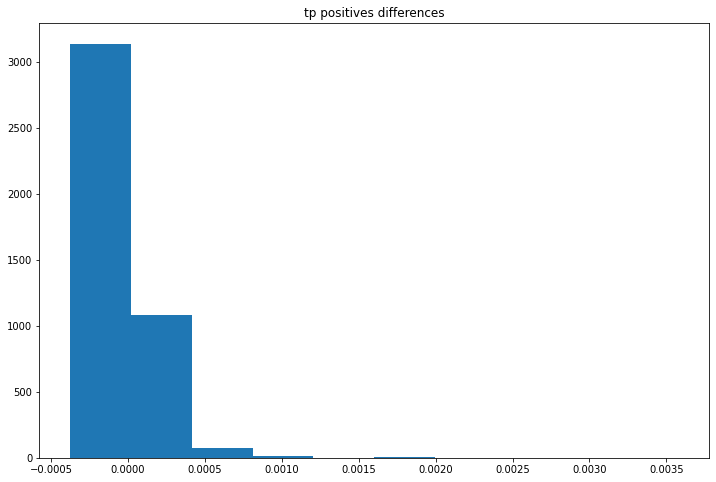

In [135]:
plt.figure(figsize=(12,8))
plt.title("tp positives differences")
plt.hist(tp_positives_difference)
plt.show()

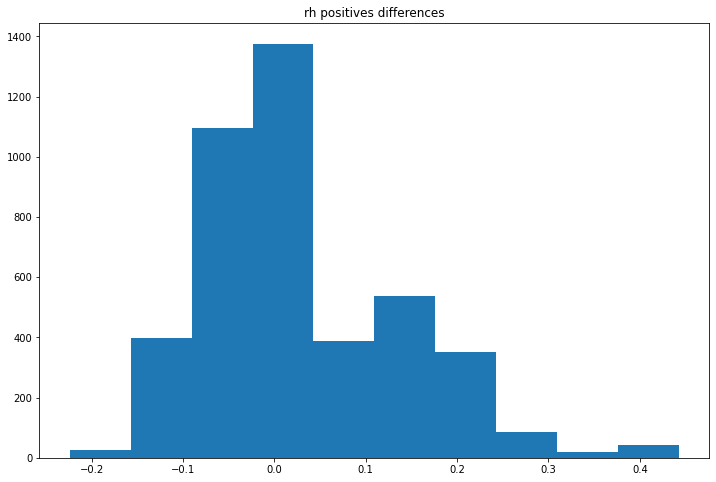

In [136]:
plt.figure(figsize=(12,8))
plt.title("rh positives differences")
plt.hist(rh_positives_difference)
plt.show()

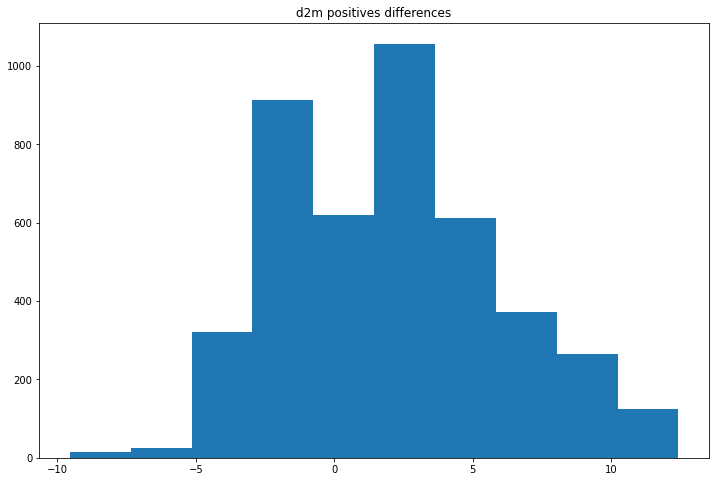

In [137]:
plt.figure(figsize=(12,8))
plt.title("d2m positives differences")
plt.hist(d2m_positives_difference)
plt.show()

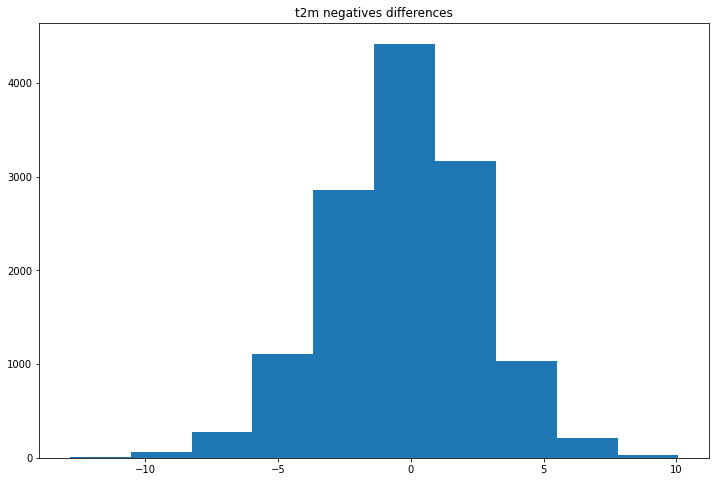

In [138]:
plt.figure(figsize=(12,8))
plt.title("t2m negatives differences")
plt.hist(t2m_negatives_difference)
plt.show()

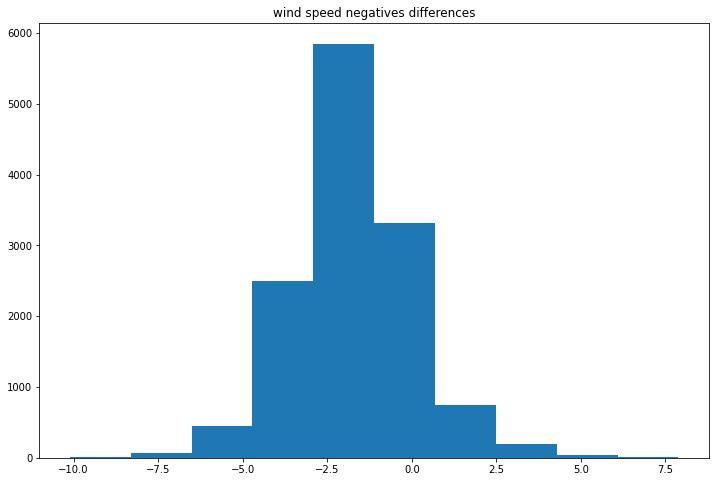

In [139]:
plt.figure(figsize=(12,8))
plt.title("wind speed negatives differences")
plt.hist(wind_speed_negatives_difference)
plt.show()

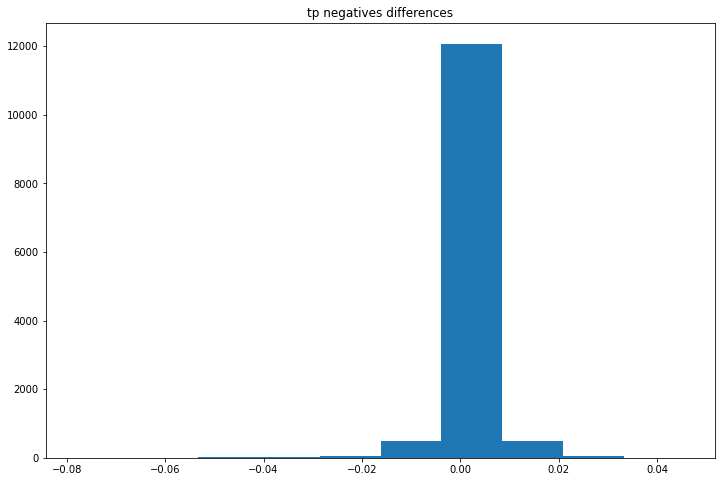

In [140]:
plt.figure(figsize=(12,8))
plt.title("tp negatives differences")
plt.hist(tp_negatives_difference)
plt.show()

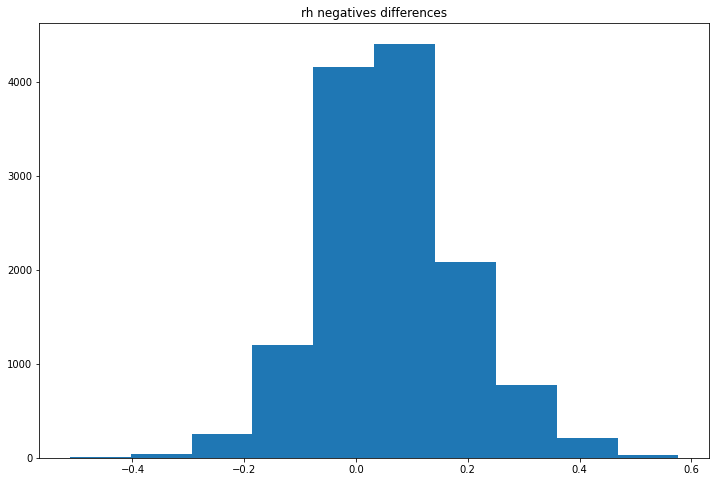

In [141]:
plt.figure(figsize=(12,8))
plt.title("rh negatives differences")
plt.hist(rh_negatives_difference)
plt.show()

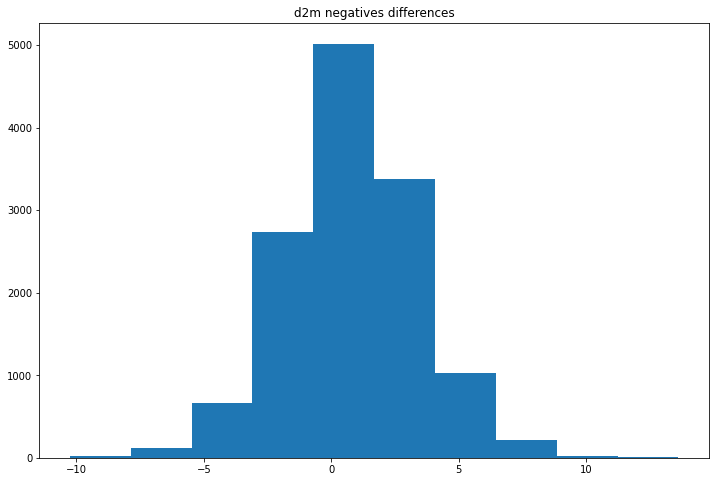

In [142]:
plt.figure(figsize=(12,8))
plt.title("d2m negatives differences")
plt.hist(d2m_negatives_difference)
plt.show()